<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/tf/c3_w2_subwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Subwords

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

tf.__version__

'2.3.0'

In [2]:
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, \
                       as_supervised=True)

In [3]:
train_data, test_data = imdb['train'], imdb['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
type(tokenizer.subwords)

list

In [6]:
[t for t in tokenizer.subwords[:5]]

['the_', ', ', '. ', 'a_', 'and_']

In [7]:
sample_string = 'TensorFlow, from basics to mastery.'

tokenized_string = tokenizer.encode(sample_string)
f'Tokenized string is: {tokenized_string}'

'Tokenized string is: [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050, 7975]'

In [8]:
original_string = tokenizer.decode(tokenized_string)
f'The original (decoded) string: {original_string}'

'The original (decoded) string: TensorFlow, from basics to mastery.'

In [9]:
for ts in tokenized_string:
  print(f'{ts} --> {tokenizer.decode([ts])}')

6307 --> Ten
2327 --> sor
4043 --> Fl
2120 --> ow
2 --> , 
48 --> from 
4249 --> basi
4429 --> cs 
7 --> to 
2652 --> master
8050 --> y
7975 --> .


In [11]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [12]:
tokenizer.vocab_size

8185

In [13]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 10s 26ms/step - loss: 0.6678 - accuracy: 0.6338 - val_loss: 0.6097 - val_accuracy: 0.7001
Epoch 2/10
391/391 [==============================] - 10s 26ms/step - loss: 0.4952 - accuracy: 0.8172 - val_loss: 0.4229 - val_accuracy: 0.8436
Epoch 3/10
391/391 [==============================] - 10s 26ms/step - loss: 0.3491 - accuracy: 0.8780 - val_loss: 0.3539 - val_accuracy: 0.8628
Epoch 4/10
391/391 [==============================] - 10s 26ms/step - loss: 0.2840 - accuracy: 0.8988 - val_loss: 0.3211 - val_accuracy: 0.8758
Epoch 5/10
391/391 [==============================] - 10s 26ms/step - loss: 0.2482 - accuracy: 0.9103 - val_loss: 0.3093 - val_accuracy: 0.8802
Epoch 6/10
391/391 [==============================] - 10s 25ms/step - loss: 0.2240 - accuracy: 0.9197 - val_loss: 0.3163 - val_accuracy: 0.8754
Epoch 7/10
391/391 [==============================] - 10s 25ms/step - loss: 0.2048 - accuracy: 0.9270 - val_loss: 0.3105 - val_accuracy:

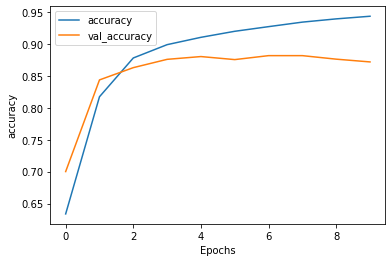

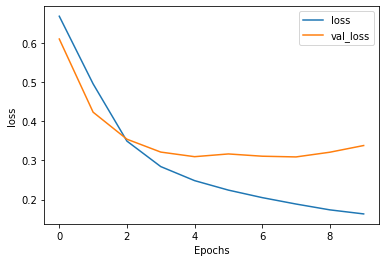

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

(8185, 64)
